In [1369]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1370]:
import numpy as np
import pandas as pd

In [1371]:
deliveries = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/IPL Win Probability Prediction/deliveries.csv')
matches = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/IPL Win Probability Prediction/matches.csv')

In [1372]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [1373]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [1374]:
total_score = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [1375]:
# first inning scores
total_score = total_score[total_score['inning'] == 1]

In [1376]:
match_df = matches.merge(total_score[['match_id', 'total_runs']], left_on = 'id', right_on = 'match_id')

In [1377]:
match_df.shape

(1095, 22)

In [1378]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

From up:   
Does not exist --> ['Kochi Tuskers Kerala'. 'Pune Warriors', 'Gujarat Lions', 'Rising Pune Supergaints', 'Rising Pune Supergaint']  
Name change --> {'Royal Challengers Bangalore': 'Royal Challengers Bengaluru', 'Rising Pune Supergiants': 'Rising Pune Supergiant', 'Delhi Daredevils': 'Delhi Capitals', 'Kings XI Punjab': 'Punjab Kings'}  
Deccan chargers is not considered to be Sunrisers Hyderabad as they have different owners and identites although they are from the same city, Hyderabad. Same with the Titans and Lions.

In [1379]:
# existing teams
teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bengaluru', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans']

In [1380]:
# rename RCB, RPSG and Delhi Franchises
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

match_df['team1'] = match_df['team1'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
match_df['team2'] = match_df['team2'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [1381]:
stadium_replacements = {
    # M Chinnaswamy variations
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',
    'M Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',

    # Wankhede variations
    'Wankhede Stadium': 'Wankhede Stadium, Mumbai',

    # MA Chidambaram variations
    'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chennai',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium, Chennai',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium, Chennai',

    # Rajiv Gandhi variations
    'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium, Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium, Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium, Hyderabad',

    # Arun Jaitley variations
    'Arun Jaitley Stadium': 'Arun Jaitley Stadium, Delhi',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium, Delhi',

    # Pune variations
    'Subrata Roy Sahara Stadium, Pune': 'Maharashtra Cricket Association Stadium, Pune',
    'Subrata Roy Sahara Stadium': 'Maharashtra Cricket Association Stadium, Pune',

    # Punjab Cricket Association variations
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium, Chandigarh': 'Punjab Cricket Association Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association Stadium, Mohali',

    # Sheikh Zayed/Zayed variations
    'Sheikh Zayed Stadium': 'Zayed Cricket Stadium, Abu Dhabi',

    # Add explicit city names where needed
    'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association Stadium, Mohali',

    # Add city names to any missing
    'Sawai Mansingh Stadium': 'Sawai Mansingh Stadium, Jaipur',
    'Eden Gardens': 'Eden Gardens, Kolkata',
    'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai',
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Narendra Modi Stadium': 'Narendra Modi Stadium, Ahmedabad',
    'Himachal Pradesh Cricket Association Stadium': 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'Shaheed Veer Narayan Singh International Stadium': 'Shaheed Veer Narayan Singh International Stadium, Raipur',
    'JSCA International Stadium Complex': 'JSCA International Stadium Complex, Ranchi',
    'Sharjah Cricket Stadium': 'Sharjah Cricket Stadium, Sharjah',
    'Dubai International Cricket Stadium': 'Dubai International Cricket Stadium, Dubai',
    'Barabati Stadium': 'Barabati Stadium, Cuttack',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Holkar Cricket Stadium': 'Holkar Cricket Stadium, Indore',
    'Barsapara Cricket Stadium': 'Barsapara Cricket Stadium, Guwahati',
    'Maharaja Yadavindra Singh International Cricket Stadium': 'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium': 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',

    # South African stadiums
    'Newlands': 'Newlands, Cape Town',
    "St George's Park": "St George's Park, Port Elizabeth",
    'Kingsmead': 'Kingsmead, Durban',
    'SuperSport Park': 'SuperSport Park, Centurion',
    'Buffalo Park': 'Buffalo Park, East London',
    'New Wanderers Stadium': 'New Wanderers Stadium, Johannesburg',
    'De Beers Diamond Oval': 'De Beers Diamond Oval, Kimberley',
    'OUTsurance Oval': 'OUTsurance Oval, Bloemfontein',

    # Legacy names
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Ahmedabad'
}

# Apply all replacements to the venue column
match_df['venue'] = match_df['venue'].replace(stadium_replacements)

In [1382]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [1383]:
match_df.shape

(910, 22)

In [1384]:
# Rain affected matches
match_df['method'].value_counts()

,count
method,
D/L,17


In [1385]:
match_df = match_df[match_df['method'] != 'D/L']

In [1386]:
match_df = match_df[['match_id', 'venue', 'winner', 'total_runs']]

In [1387]:
deliveries_df = match_df.merge(deliveries, on='match_id')

In [1388]:
deliveries_df = deliveries_df[deliveries_df['inning'] == 2]

In [1389]:
deliveries_df

,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214103,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
214104,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
214105,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
214106,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [1390]:
deliveries_df.shape

(103500, 20)

In [1391]:
# total score calculated ball by ball
deliveries_df['current_score'] = deliveries_df.groupby('match_id')['total_runs_y'].cumsum()

<ipython-input-1391-5adc7588c085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_df['current_score'] = deliveries_df.groupby('match_id')['total_runs_y'].cumsum()


In [1392]:
deliveries_df.head(3)

,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2


In [1393]:
# runs required to chase
deliveries_df['required_runs'] = deliveries_df['total_runs_x']  - deliveries_df['current_score'] + 1 # since target

<ipython-input-1393-009dfe8b0dba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_df['required_runs'] = deliveries_df['total_runs_x']  - deliveries_df['current_score'] + 1 # since target


In [1394]:
# balls left to defend
deliveries_df['balls_left'] = 120 - (deliveries_df['over']*6 + deliveries_df['ball'])

<ipython-input-1394-8216058d44e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_df['balls_left'] = 120 - (deliveries_df['over']*6 + deliveries_df['ball'])


In [1395]:
deliveries_df

,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,required_runs,balls_left
124,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,222,119
125,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,221,118
126,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,221,117
127,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,220,116
128,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,219,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214103,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,4,61
214104,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,3,60
214105,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,2,59
214106,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,1,58


In [1396]:
# wickets left
deliveries_df['wickets_left'] = 10 - deliveries_df.groupby('match_id')['is_wicket'].cumsum()

In [1397]:
deliveries_df

,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,required_runs,balls_left,wickets_left
124,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,NaN,NaN,NaN,1,222,119,10
125,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,NaN,NaN,NaN,2,221,118,10
126,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,NaN,NaN,NaN,2,221,117,10
127,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,NaN,NaN,NaN,3,220,116,10
128,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,NaN,NaN,NaN,4,219,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214103,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,NaN,NaN,NaN,110,4,61,8
214104,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,NaN,NaN,NaN,111,3,60,8
214105,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,NaN,NaN,NaN,112,2,59,8
214106,1426312,"MA Chidambaram Stadium, Chennai",Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,NaN,NaN,NaN,113,1,58,8


In [1398]:
# Current Runrate
deliveries_df['CRR'] = (deliveries_df['current_score']*6)/(120- deliveries_df['balls_left'])

In [1399]:
deliveries_df.head()

,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,required_runs,balls_left,wickets_left,CRR
124,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,0,NaN,NaN,NaN,1,222,119,10,6.0
125,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,NaN,NaN,NaN,2,221,118,10,6.0
126,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,0,NaN,NaN,NaN,2,221,117,10,4.0
127,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,0,NaN,NaN,NaN,3,220,116,10,4.5
128,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,0,NaN,NaN,NaN,4,219,115,10,4.8


In [1400]:
# RRR
deliveries_df['RRR'] = deliveries_df['required_runs']*6/deliveries_df['balls_left']

In [1401]:
deliveries_df.head()

,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,required_runs,balls_left,wickets_left,CRR,RRR
124,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,NaN,NaN,1,222,119,10,6.0,11.193277
125,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,NaN,NaN,2,221,118,10,6.0,11.237288
126,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,NaN,NaN,2,221,117,10,4.0,11.333333
127,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,NaN,NaN,3,220,116,10,4.5,11.379310
128,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,NaN,NaN,4,219,115,10,4.8,11.426087


In [1402]:
def result(match):
  return 1 if match['batting_team'] == match['winner'] else 0

In [1403]:
deliveries_df['result'] = deliveries_df.apply(result, axis = 1)

In [1404]:
deliveries_df.head()

,match_id,venue,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,required_runs,balls_left,wickets_left,CRR,RRR,result
124,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,NaN,NaN,1,222,119,10,6.0,11.193277,0
125,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,NaN,NaN,NaN,2,221,118,10,6.0,11.237288,0
126,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,NaN,NaN,2,221,117,10,4.0,11.333333,0
127,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,NaN,NaN,3,220,116,10,4.5,11.379310,0
128,335982,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,NaN,NaN,4,219,115,10,4.8,11.426087,0


In [1405]:
final_df = deliveries_df[['batting_team', 'bowling_team', 'venue', 'required_runs', 'balls_left', 'wickets_left', 'total_runs_x', 'CRR', 'RRR', 'result']]

In [1406]:
# sample
final_df = final_df.sample(final_df.shape[0])

In [1407]:
final_df.sample()

,batting_team,bowling_team,venue,required_runs,balls_left,wickets_left,total_runs_x,CRR,RRR,result
32749,Royal Challengers Bangalore,Delhi Daredevils,"Arun Jaitley Stadium, Delhi",78,76,9,160,11.318182,6.157895,1


In [1408]:
final_df.dropna(inplace=True)

In [1409]:
final_df = final_df[final_df['balls_left']!=0]

In [1410]:
# Train Test split
from sklearn.model_selection import train_test_split

x = final_df.iloc[:, :-1]
y = final_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [1411]:
x_train

,batting_team,bowling_team,venue,required_runs,balls_left,wickets_left,total_runs_x,CRR,RRR
184196,Delhi Capitals,Royal Challengers Bangalore,"M Chinnaswamy Stadium, Bengaluru",79,38,4,174,7.024390,12.473684
7922,Delhi Daredevils,Mumbai Indians,"Arun Jaitley Stadium, Delhi",80,49,6,176,8.197183,9.795918
57684,Kings XI Punjab,Royal Challengers Bangalore,"Punjab Cricket Association Stadium, Mohali",90,39,6,190,7.481481,13.846154
57050,Kolkata Knight Riders,Rajasthan Royals,"Eden Gardens, Kolkata",5,19,8,132,7.603960,1.578947
141459,Kings XI Punjab,Mumbai Indians,"Dubai International Cricket Stadium, Dubai",155,105,10,176,8.800000,8.857143
...,...,...,...,...,...,...,...,...,...
80397,Rajasthan Royals,Chennai Super Kings,"Narendra Modi Stadium, Ahmedabad",110,82,10,156,7.421053,8.048780
98989,Kolkata Knight Riders,Kings XI Punjab,"Eden Gardens, Kolkata",27,37,8,170,10.409639,4.378378
44182,Mumbai Indians,Chennai Super Kings,"Wankhede Stadium, Mumbai",124,83,9,173,8.108108,8.963855
79720,Chennai Super Kings,Mumbai Indians,"Wankhede Stadium, Mumbai",52,54,8,183,12.000000,5.777778


We have 3 string columns, use one-hot encoding

In [1412]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [1413]:
trf = ColumnTransformer(
    transformers=[
        ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'venue']),
    ],
    remainder='passthrough'
)

In [1414]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [1415]:
pipe = Pipeline(steps =[
    ('step1', trf),
    # ('step2', RandomForestClassifier()) # We could also use RandomForestClassifier, which gives us a high accuracy of 99.6%, but since we want the probability to not be skewed at all times (0.96, 0.04) we do not want to use that.
    ('step2', LogisticRegression(solver='liblinear'))
])

In [1416]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'venue'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [1417]:
y_pred = pipe.predict(x_test)

In [1418]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8064860148334868

In [1419]:
pipe.predict_proba(x_test)  # Mostly skewed for Random Forest

array([[0.79395198, 0.20604802],
       [0.32281066, 0.67718934],
       [0.42225285, 0.57774715],
       ...,
       [0.77713663, 0.22286337],
       [0.08324777, 0.91675223],
       [0.7771798 , 0.2228202 ]])

In [1420]:
deliveries_df['match_id'] = pd.factorize(deliveries_df['match_id'])[0] + 1

In [1421]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [1422]:
def match_progression(x_df, match_id, pipe):
    # Filter data for the specific match and only consider deliveries at the end of each over
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]

    # Select relevant columns and drop rows with missing values
    temp_df = match[['batting_team', 'bowling_team', 'venue', 'required_runs', 'balls_left',
                     'wickets_left', 'total_runs_x', 'CRR', 'RRR']].dropna()

    # Remove rows where there are no balls left (match is over)
    temp_df = temp_df[temp_df['balls_left'] != 0]

    # Predict win/lose probabilities using the provided model pipeline
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)  # Probability of losing
    temp_df['win'] = np.round(result.T[1] * 100, 1)   # Probability of winning

    # Add an index to indicate the progression by over
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Extract target runs and compute runs scored in each over
    target = temp_df['total_runs_x'].values[0]+1
    runs = list(temp_df['required_runs'].values)
    new_runs = runs[:]
    runs.insert(0, target)  # Include the initial target at the start
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    # Compute wickets lost in each over
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)  # Initial number of wickets (10)
    wickets.append(0)          # Append 0 to signify no wickets left at the end
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    # Display the target score
    print("Target-", target)

    # Retain only the relevant columns for the final output
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target

In [1430]:
temp_df,target = match_progression(deliveries_df, 877, pipe)  # 335982 start of match id's
temp_df

Target- 166


,end_of_over,runs_after_over,wickets_in_over,lose,win
210754,1,4,0,88.0,12.0
210761,2,17,0,76.0,24.0
210768,3,26,0,45.6,54.4
210774,4,17,0,29.5,70.5
210780,5,23,0,12.6,87.4
210786,6,20,0,5.6,94.4
210792,7,19,0,2.6,97.4
210798,8,17,0,1.3,98.7
210804,9,14,0,0.8,99.2


Text(0.5, 1.0, 'Target-166')

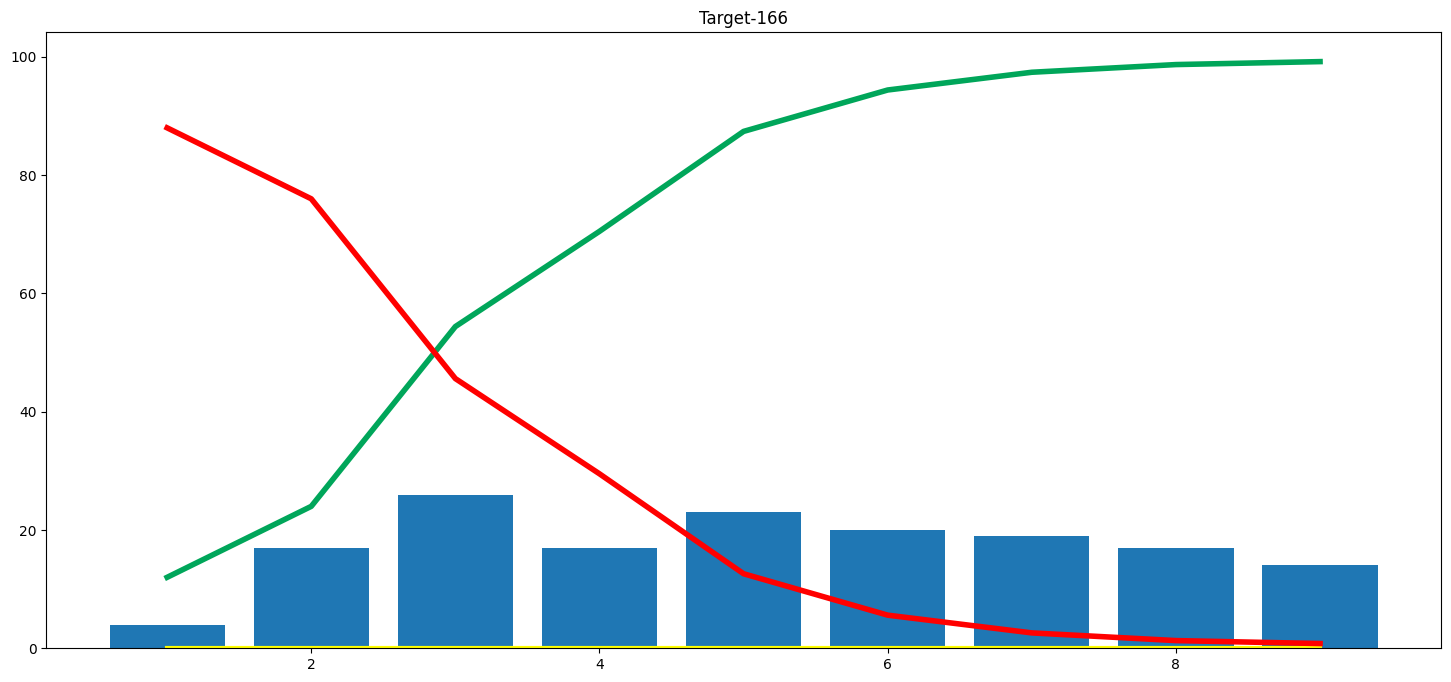

In [1431]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [1425]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bengaluru',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [1426]:
deliveries_df['venue'].unique()

array(['M Chinnaswamy Stadium, Bengaluru',
       'Punjab Cricket Association Stadium, Mohali',
       'Arun Jaitley Stadium, Delhi', 'Wankhede Stadium, Mumbai',
       'Sawai Mansingh Stadium, Jaipur',
       'MA Chidambaram Stadium, Chennai', 'Eden Gardens, Kolkata',
       'Dr DY Patil Sports Academy, Mumbai', 'Newlands, Cape Town',
       "St George's Park, Port Elizabeth", 'Kingsmead, Durban',
       'SuperSport Park, Centurion', 'Buffalo Park, East London',
       'New Wanderers Stadium, Johannesburg',
       'De Beers Diamond Oval, Kimberley',
       'OUTsurance Oval, Bloemfontein', 'Brabourne Stadium, Mumbai',
       'Narendra Modi Stadium, Ahmedabad',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Maharashtra Cricket Association Stadium, Pune',
       'Rajiv Gandhi International Stadium, Hyderabad',
       'Shaheed Veer Narayan Singh International Stadium, Raipur',
       'JSCA International Stadium Complex, Ranchi',
       'Zayed Cricket Stadium, A

In [1427]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [1429]:
from google.colab import files
files.download('pipe.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>